In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import random as rd
import statistics as stat

import warnings

import time
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.model_selection import GridSearchCV

In [2]:
## Guassian kernel
def guassian(x,y,sigma):
    return np.exp(-np.linalg.norm(x-y)**2/(2*sigma**2))

## Random Fourier feature
def FRF(X,w,b):
    D=b.shape[0]
    z=np.matmul(w,X.T)+b.reshape(D,1)
    return (2/D)**0.5*np.cos(z).T

## 2 Census
### 2.1 Import data

In [3]:
f=open('Census.data')
sentimentlist = []
for l in f:
    s=l.split( )
    sentimentlist.append([str(i) for i in s])
f.close()
Census=pd.DataFrame(sentimentlist)
Census.head()

,0,1,2,3,4,5,6,7,8,9,...,128,129,130,131,132,133,134,135,136,137
0,1.0000000,124.0000000,3173.0000000,852.0000000,1214.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4607627,...,119.5840000,287.0000000,0.0000000,0.0000000,0.0000000,144.1250000,0.1250000,0.5000000,0.3636364,0.4545455
1,1.0000000,676.0000000,468.0000000,120.0000000,182.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4572650,...,78.9473684,0.0000000,0.0000000,0.0000000,0.0000000,50.0000000,0.0000000,1.0000000,0.1666667,0.6666667
2,1.0000000,820.0000000,14732.0000000,4154.0000000,4921.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4874423,...,183.1538462,213.0000000,329.0000000,0.0000000,384.5000000,335.2328767,0.3561644,0.0958904,0.3400000,0.1600000
3,1.0000000,988.0000000,14507.0000000,4248.0000000,5838.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4619149,...,200.2592593,236.0000000,295.6666667,0.0000000,232.5000000,264.4556962,0.5632911,0.1075949,0.1694915,0.4830508
4,1.0000000,1132.0000000,14917.0000000,4152.0000000,5745.0000000,0.0000000,0.0000000,0.0000000,1.0000000,0.4552524,...,163.4795322,237.0000000,207.8000000,0.0000000,113.5000000,196.1741935,0.4585987,0.1592357,0.1538462,0.4615385


### 2.2 Visualization
+ state and code

In [4]:
state=[]
for i in range(1,57):
    k=len(Census.iloc[:,111][Census.iloc[:,0].values.astype('float')==i])
    if k>=1:
        state.append(i)
print(len(state))

boxes=[]
for i in state:
    boxes.append(Census.iloc[:,111][Census.iloc[:,0].values.astype('float')==i].values.astype('float'))

50


In [51]:
Coden=[11765,2789,942,361,206]

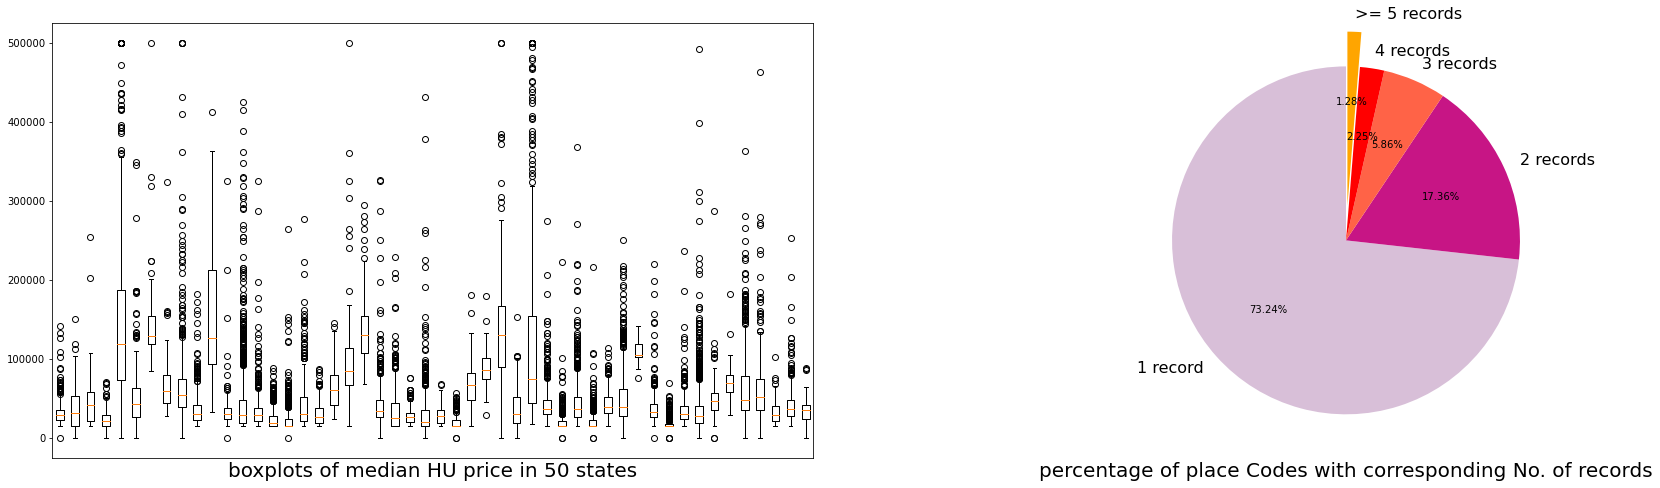

In [72]:
fig,ax=plt.subplots(1,2,figsize=(30,8))
ax[0].boxplot(boxes,notch=False, labels = state,patch_artist = False)
ax[0].set_xticks([])
ax[0].set_xlabel('boxplots of median HU price in 50 states',fontsize=20)
ticks=['1 record','2 records','3 records','4 records','>= 5 records']
sizes=Coden
colors=['thistle','mediumvioletred','tomato','red','orange']
patches,text1,text2 = ax[1].pie(sizes,explode=[0,0,0,0,0.2],labels=ticks,colors=colors,
                             autopct = '%3.2f%%',startangle =90,pctdistance = 0.6)
ax[1].set_xlabel('percentage of place Codes with corresponding No. of records',fontsize=20)
for t in text1:
    t.set_size(16)

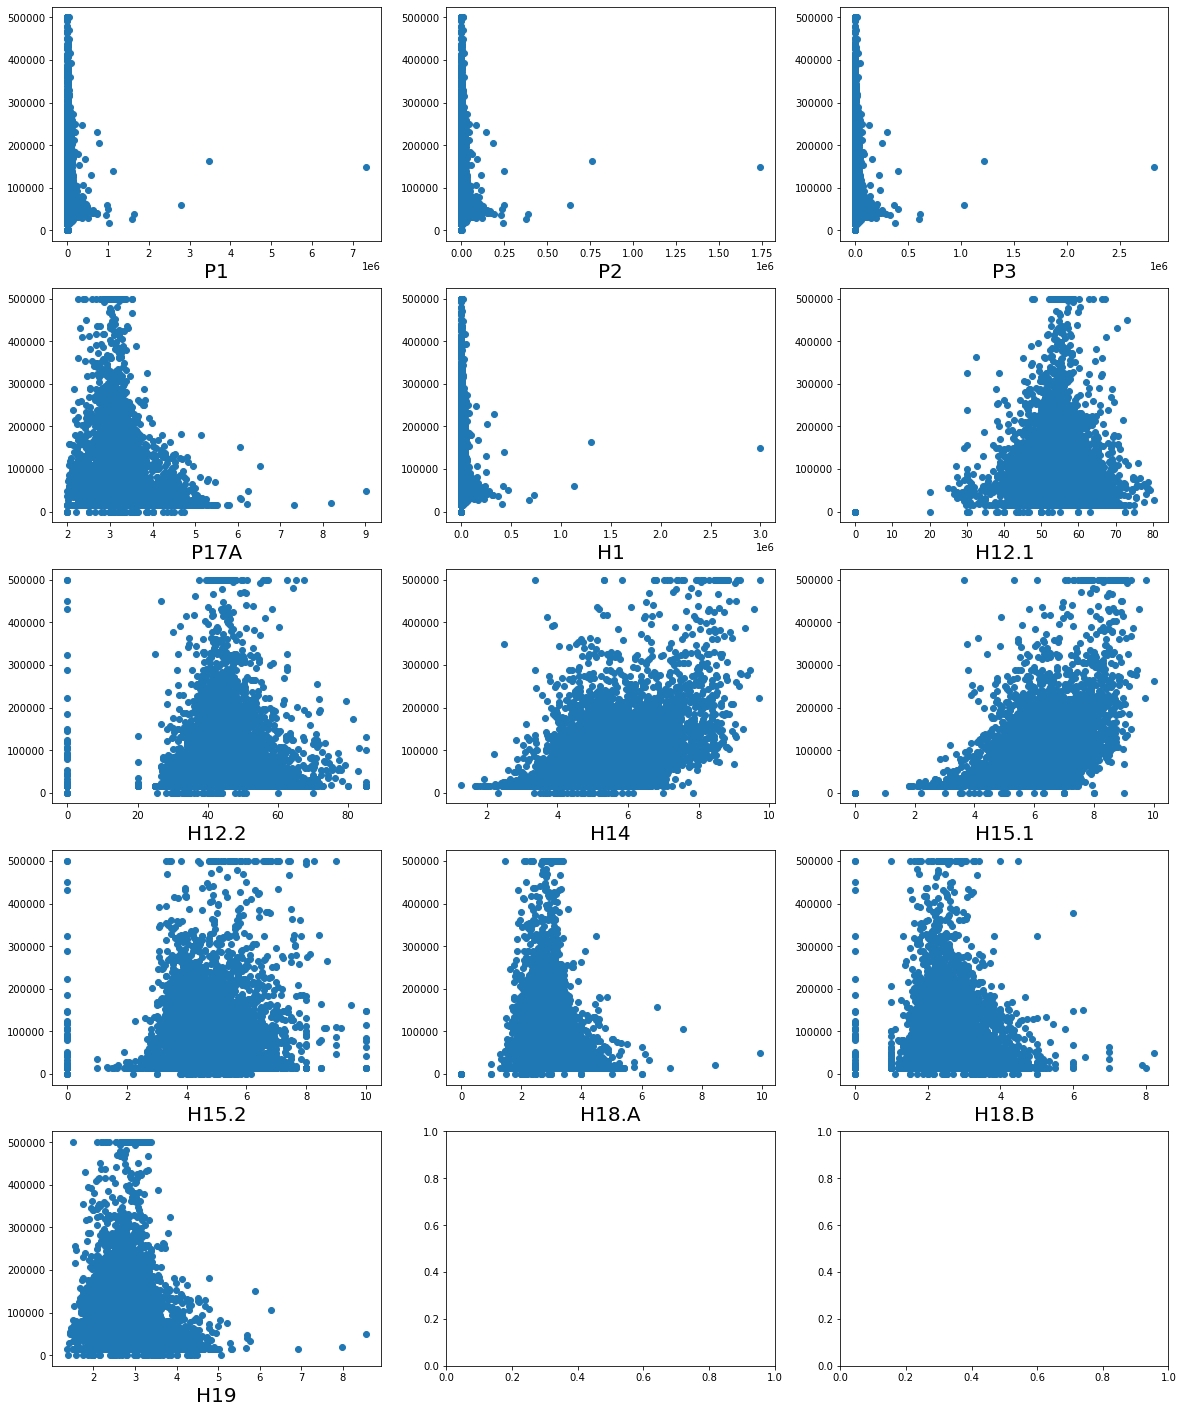

In [87]:
##2,3,4,57,90,91,94,95,96,103,104,105
num_col=[2,3,4,38,57,90,91,94,95,96,104,105,106]
col_name=['P1','P2','P3','P17A','H1','H12.1','H12.2','H14','H15.1','H15.2','H18.A','H18.B','H19']
fig,ax=plt.subplots(5,3,figsize=(20,25))
for i in range(13):
    ax[i//3,i-i//3*3].scatter(Census.iloc[:,num_col[i]].values.astype('float'),Census.iloc[:,111].values.astype('float'))
    ax[i//3,i-i//3*3].set_xlabel(col_name[i], fontsize=20)
    #ax[i//3,i-i//3*3].set_xlabel(CPU_col[i-1],fontsize=14)

In [4]:
## 5,6,7,8,62,63,64,65
## feature scaling
col=[*range(1,106)]+[134,135,136,137]+[111]
census=pd.DataFrame()
for i in col:
    variable=Census.iloc[:,i].values.astype('float')
    # (x-min(x))/(max(x)-min(x))
    census[i]=(variable-variable.min())/(variable.max()-variable.min())
census=census.dropna(axis=1)
print(census.shape)
num_data=census.iloc[:,:-1].values
print(num_data)

string_data=Census.iloc[:,0]
#one_hot encoding
string_data=pd.get_dummies(string_data)
print(string_data.shape)
string_data=string_data.values
print(string_data)

<ipython-input-4-90d6ff00a799>:8: RuntimeWarning: invalid value encountered in true_divide
  census[i]=(variable-variable.min())/(variable.max()-variable.min())


(22784, 102)
[[8.26123360e-04 4.33045156e-04 4.90516206e-04 ... 5.00000000e-01
  3.63636400e-01 4.54545500e-01]
 [6.98855708e-03 6.36389286e-05 6.85915729e-05 ... 1.00000000e+00
  1.66666700e-01 6.66666700e-01]
 [8.59614848e-03 2.01159103e-03 2.39378825e-03 ... 9.58904000e-02
  3.40000000e-01 1.60000000e-01]
 ...
 [9.47530003e-01 7.83878648e-04 8.94572447e-04 ... 6.13445400e-01
  1.11111100e-01 6.66666700e-01]
 [9.48534747e-01 1.68520253e-04 1.82142328e-04 ... 8.40425500e-01
  9.52381000e-02 7.14285700e-01]
 [9.66955066e-01 1.82996061e-05 2.30559909e-05 ... 5.00000000e-01
  0.00000000e+00 1.00000000e+00]]
(22784, 50)
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
X = np.append(string_data, num_data, axis=1)
y=np.array(census.iloc[:,-1])
train_length=18000
X_train = X[:train_length]
y_train = y[:train_length]
X_test = X[train_length:]
y_test = y[train_length:]
print(X_train.shape,y_train.shape)

(18000, 151) (18000,)


### 2.3 Grid search

In [10]:
param_grid = {'C':[0.1,0.01],'gamma':[1,0.1,0.01,0.001],'epsilon':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVR(kernel='rbf'),param_grid,refit = True, verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.1, epsilon=1, gamma=1 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=1 .......................................
[CV] ........................ C=0.1, epsilon=1, gamma=1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.1 .....................................
[CV] ...................... C=0.1, epsilon=1, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.1 .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.1, epsilon=1, gamma=0.1, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.01 ....................................
[CV] ..................... C=0.1, epsilon=1, gamma=0.01, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.01 ....................................
[CV] ..................... C=0.1, epsilon=1, gamma=0.01, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.01 ....................................
[CV] ..................... C=0.1, epsilon=1, gamma=0.01, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.01 ....................................
[CV] ..................... C=0.1, epsilon=1, gamma=0.01, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.01 ....................................
[CV] ..................... C=0.1, epsilon=1, gamma=0.01, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.001 ...................................
[CV] .................... C=0.1, epsilon=1, gamma=0.001, total=   0.0s
[CV] C=0.1, epsilon=1, gamma=0.001 ...................................
[CV] .

[CV] ................. C=0.1, epsilon=0.01, gamma=0.001, total=  26.8s
[CV] C=0.1, epsilon=0.01, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.01, gamma=0.001, total=  25.8s
[CV] C=0.1, epsilon=0.01, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.01, gamma=0.001, total=  26.7s
[CV] C=0.1, epsilon=0.01, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.01, gamma=0.001, total=  25.2s
[CV] C=0.1, epsilon=0.01, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.01, gamma=0.001, total=  27.0s
[CV] C=0.1, epsilon=0.01, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.01, gamma=0.001, total=  26.7s
[CV] C=0.1, epsilon=0.01, gamma=0.001 ................................
[CV] ................. C=0.1, epsilon=0.01, gamma=0.001, total=  25.7s
[CV] C=0.1, epsilon=0.01, gamma=0.001 ................................
[CV] .

[CV] ..................... C=0.01, epsilon=0.1, gamma=1, total=   3.4s
[CV] C=0.01, epsilon=0.1, gamma=1 ....................................
[CV] ..................... C=0.01, epsilon=0.1, gamma=1, total=   4.3s
[CV] C=0.01, epsilon=0.1, gamma=1 ....................................
[CV] ..................... C=0.01, epsilon=0.1, gamma=1, total=   4.2s
[CV] C=0.01, epsilon=0.1, gamma=1 ....................................
[CV] ..................... C=0.01, epsilon=0.1, gamma=1, total=   3.8s
[CV] C=0.01, epsilon=0.1, gamma=1 ....................................
[CV] ..................... C=0.01, epsilon=0.1, gamma=1, total=   4.2s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................
[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   2.7s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................
[CV] ................... C=0.01, epsilon=0.1, gamma=0.1, total=   3.6s
[CV] C=0.01, epsilon=0.1, gamma=0.1 ..................................
[CV] .

[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=  45.0s
[CV] C=0.01, epsilon=0.001, gamma=0.1 ................................
[CV] ................. C=0.01, epsilon=0.001, gamma=0.1, total=  45.3s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=  46.0s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=  46.8s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=  46.8s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=  46.5s
[CV] C=0.01, epsilon=0.001, gamma=0.01 ...............................
[CV] ................ C=0.01, epsilon=0.001, gamma=0.01, total=  46.3s
[CV] C=0.01, epsilon=0.001, gamma=0.001 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 68.3min finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.01], 'epsilon': [1, 0.1, 0.01, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001]},
             verbose=2)

In [11]:
grid.best_params_

{'C': 0.1, 'epsilon': 0.01, 'gamma': 0.1}

In [6]:
# median adjustment
xmedian=np.array([stat.median(X_train[:,i]) for i in range(151)]);print(xmedian[-2:])

[0.04270515 0.5       ]


### 2.4 Random Fourier feature

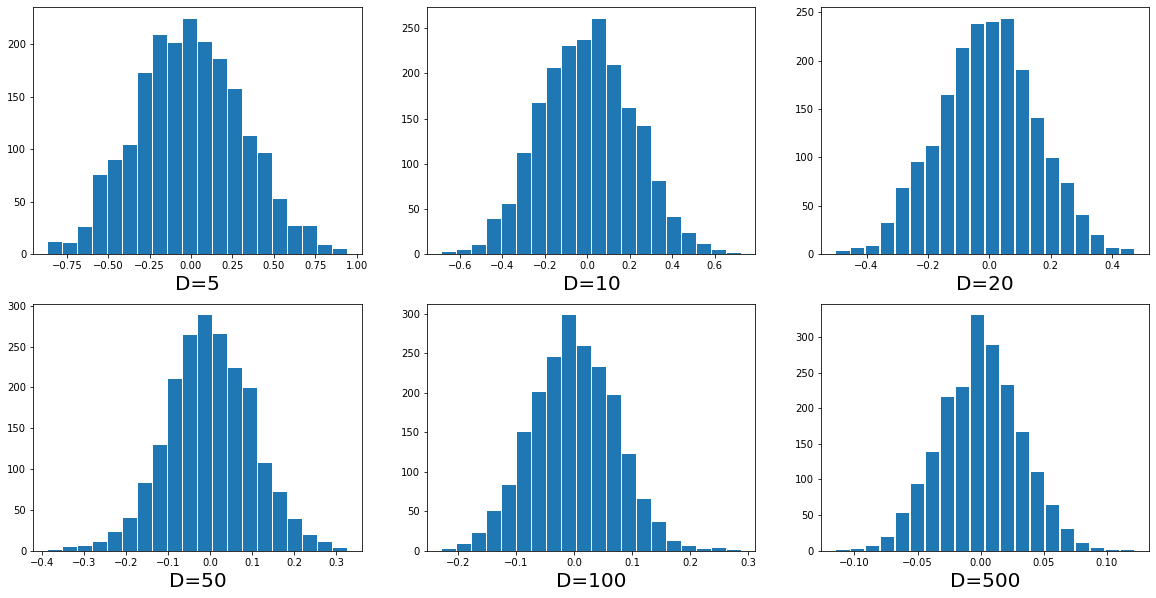

In [37]:
fig,ax=plt.subplots(2,3,figsize=(20,10));Dnum=[5,10,20,50,100,500]
for j in range(6):
    approz=[]
    for i in range(2000):
        N=Dnum[j]
        d=X.shape[1];mean=np.zeros(d);variance=np.eye(d)/5
        w=np.random.multivariate_normal(mean,variance,N)
        b=np.random.uniform(0,2*np.pi,N)
        z=np.matmul(xmedian,w.T)+b
        X_frf=(2/N)**0.5*np.cos(z)
        approz.append(np.matmul(X_frf,X_frf))
    ax[j//3,j-j//3*3].hist(np.array(approz)-1,rwidth=0.9,bins=20)
    ax[j//3,j-j//3*3].set_xlabel('D='+str(Dnum[j]),fontsize=20)

0
1
2
3
4
5


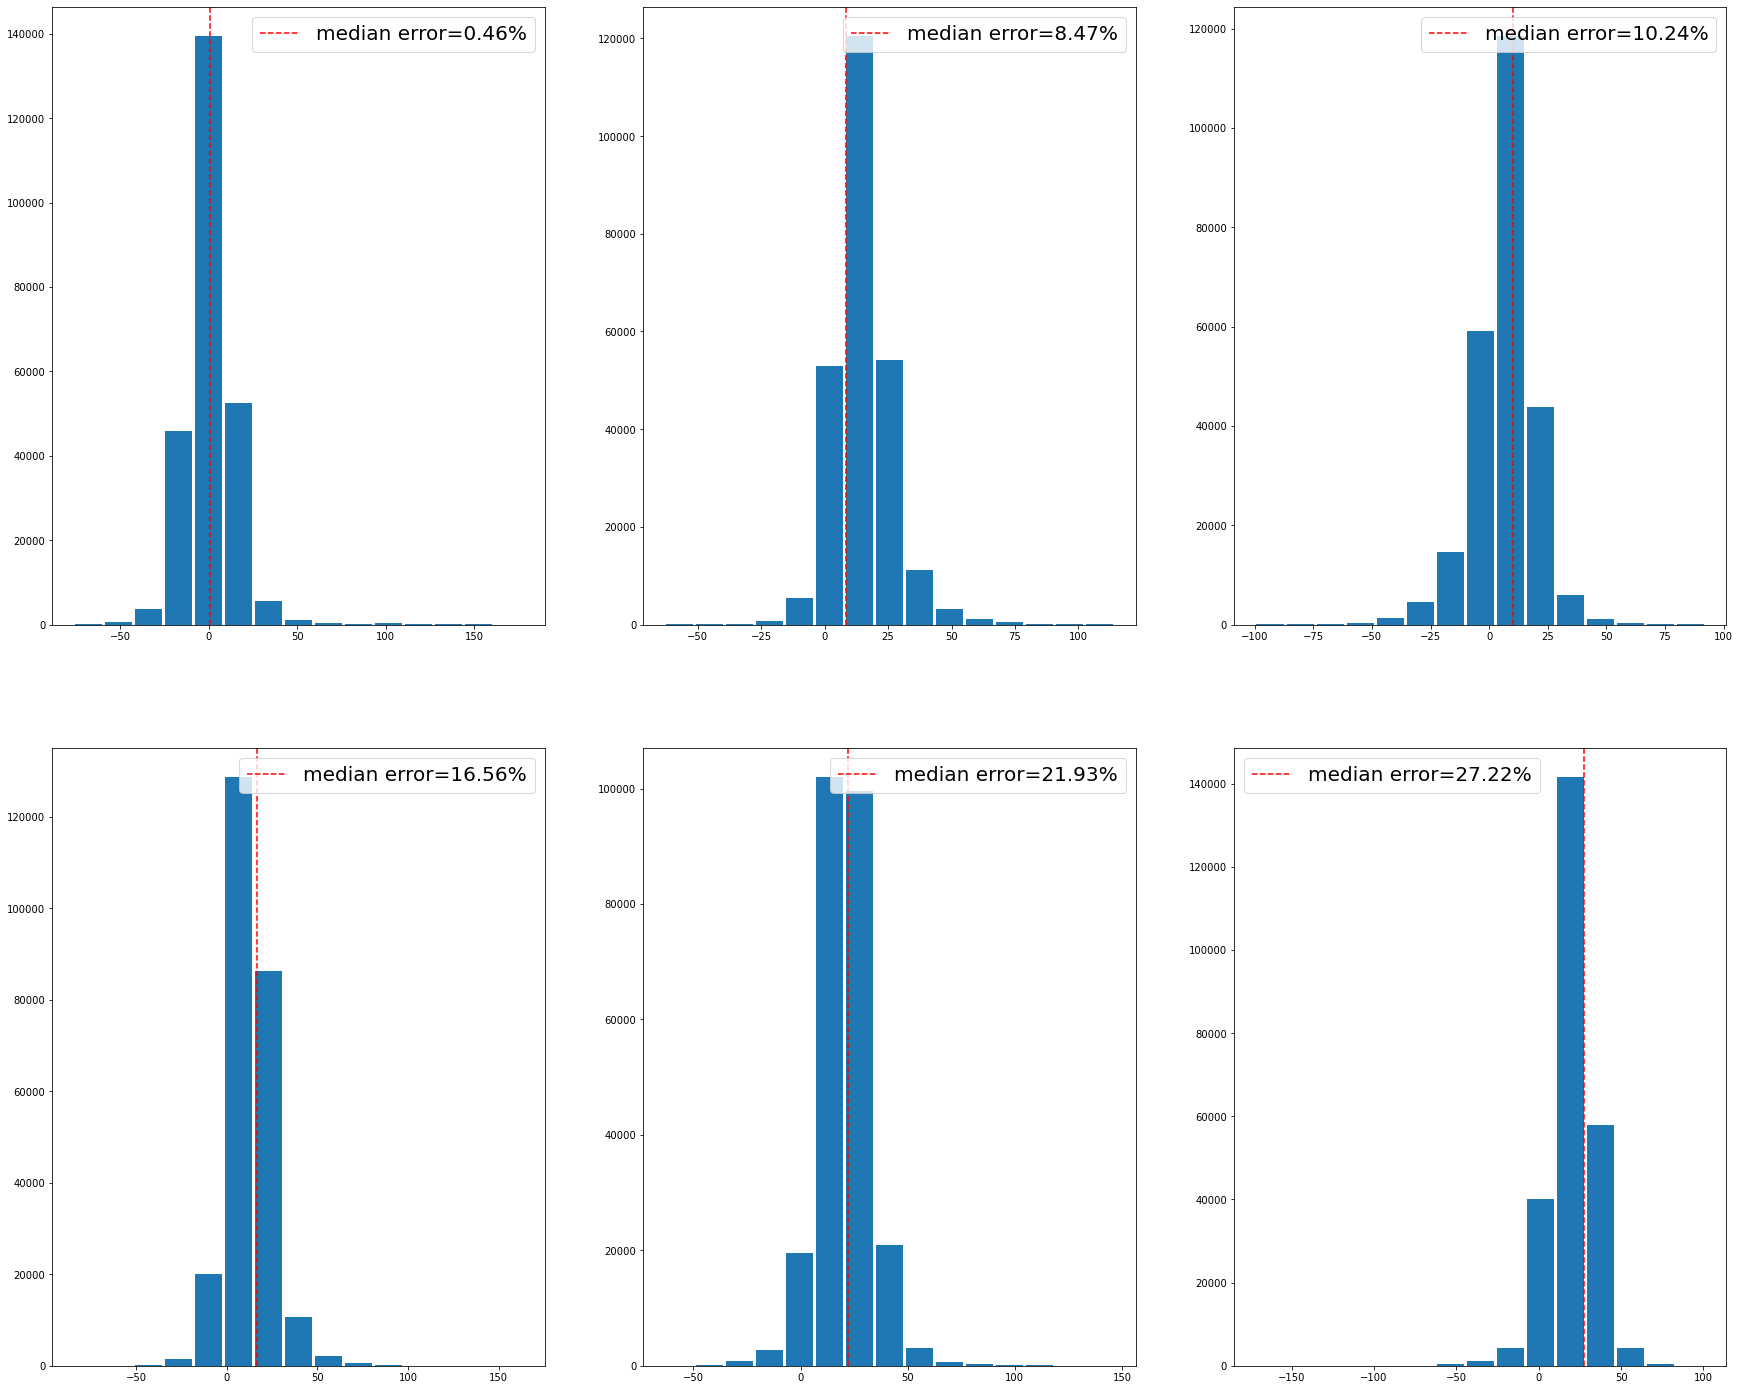

In [7]:
rd.seed(123);sigma=5**0.5;np.random.seed(1)
xi=rd.sample([*range(X_train.shape[0])],500)
## kernel of x_train
gauX=np.array([[guassian(X_train[i],X_train[j],sigma)for i in xi] for j in xi]).ravel()

fig,ax=plt.subplots(2,3,figsize=(30,25))
we=[[] for i in range(6)];l=np.array([1 for i in range(6)])
d=X.shape[1];mean=np.zeros(d);variance=np.eye(d)/5
while len(l[np.array([len(k)>=1 for k in we])])<6:
    w=np.random.multivariate_normal(mean,variance,100)
    b=np.random.uniform(0,2*np.pi,100)
    z=np.matmul(xmedian,w.T)+b
    X_frf=(2/100)**0.5*np.cos(z)
    if np.matmul(X_frf,X_frf)-1<0.05 and np.matmul(X_frf,X_frf)-1>0:
        # small error of median
        we[0].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.1 and np.matmul(X_frf,X_frf)-1>0.05:
        # large error of median
        we[1].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.15 and np.matmul(X_frf,X_frf)-1>0.1:
        # large error of median
        we[2].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.2 and np.matmul(X_frf,X_frf)-1>0.15:
        # large error of median
        we[3].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.25 and np.matmul(X_frf,X_frf)-1>0.2:
        # large error of median
        we[4].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.matmul(X_frf,X_frf)-1<0.3 and np.matmul(X_frf,X_frf)-1>0.25:
        # large error of median
        we[5].append([w,b,np.matmul(X_frf,X_frf)-1])

wlist=[];blist=[];erlist=[]
for i in range(6):
    # find small error w,b
    print(i)
    ## random fourier feature approximate
    X_frf=FRF(X_train,we[i][0][0],we[i][0][1])
    frfX=np.array([[np.matmul(X_frf[i],X_frf[j]) for i in xi] for j in xi]).ravel()
    
    ax[i//3,i-i//3*3].hist(100*(frfX-gauX)/gauX,rwidth=0.9,bins=15)
    ax[i//3,i-i//3*3].axvline(x=100*we[i][0][2],linestyle='--',label='median error='+str(round(100*we[i][0][2],2))+'%',c='red')
    ax[i//3,i-i//3*3].legend(fontsize=20)
    wlist.append(we[i][0][0]);blist.append(we[i][0][1]);erlist.append(we[i][0][2])
    
    
plt.show()


In [8]:
l=np.array([1,1,1,1]);we=[[],[],[],[]];np.random.seed(1)
while len(l[np.array([len(k)>=50 for k in we])])<4:
    d=X.shape[1];mean=np.zeros(d);variance=np.eye(d)/5
    w=np.random.multivariate_normal(mean,variance,100)
    b=np.random.uniform(0,2*np.pi,100)
    z=np.matmul(xmedian,w.T)+b
    X_frf=(2/100)**0.5*np.cos(z)
    if np.abs(np.matmul(X_frf,X_frf)-1)<0.05 and np.abs(np.matmul(X_frf,X_frf)-1)>0:
        # small error of median
        we[0].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.abs(np.matmul(X_frf,X_frf)-1)<0.1 and np.abs(np.matmul(X_frf,X_frf)-1)>0.05:
        # large error of median
        we[1].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.abs(np.matmul(X_frf,X_frf)-1)<0.15 and np.abs(np.matmul(X_frf,X_frf)-1)>0.1:
        # large error of median
        we[2].append([w,b,np.matmul(X_frf,X_frf)-1])
    elif np.abs(np.matmul(X_frf,X_frf)-1)>0.15:
        # large error of median
        we[3].append([w,b,np.matmul(X_frf,X_frf)-1])
    
par=[p[:50] for p in we]

$\epsilon=0.01$

In [9]:
# SVR
# parameters via grid serch: C=0.1, epsilon=0.01, gamma=0.1
timeu=[];i=0
while i <11:
    print(i)
    start_time=time.time()
    model1=SVR(kernel='rbf',C=0.1,epsilon=0.01,gamma=0.1)
    model1.fit(X_train,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
print('time used:',np.array(timeu).mean())

print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

# prediction
pre1=model1.predict(X_train);tre1=model1.predict(X_test)
# error of prediction
err1=y_train-pre1;terr1=y_test-tre1
# denominator of R-score
den1=((err1-err1.mean())**2).sum();den2=((terr1-terr1.mean())**2).sum()

0
1
2
3
4
5
6
7
8
9
10
time used: 35.02552221038125
0.7662856530727368
0.6329919927994327


In [22]:
model1=SVR(kernel='rbf',C=0.1,epsilon=0.01,gamma=0.1)
model1.fit(X_train,y_train)
# prediction
pre1=model1.predict(X_train);tre1=model1.predict(X_test)
# error of prediction
err1=y_train-pre1;terr1=y_test-tre1
# denominator of R-score
den1=((err1-err1.mean())**2).sum();den2=((terr1-terr1.mean())**2).sum()

**median error**

In [10]:
for j in range(4):
    print(j)
    timeu=[];xscore=[];tscore=[];xsim=[];tsim=[]
    for i in range(50):
        w,b,e=par[j][i]
        X1_frf=FRF(X_train,w,b);T1_frf=FRF(X_test,w,b)
        start_time=time.time()
        model2=LinearSVR(C=0.1,epsilon=0.01)
        model2.fit(X1_frf,y_train)
        timeu.append(time.time()-start_time)
        xscore.append(model2.score(X1_frf,y_train));tscore.append(model2.score(T1_frf,y_test))
        prelib=model2.predict(X1_frf);trelib=model2.predict(T1_frf)
        # model similarity
        diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
        xsim.append(diff1);tsim.append(diff2)
    print('time used:',np.array(timeu).mean())
    print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
    print('model similarity(train):',np.array(xsim).mean(),',(test):',np.array(tsim).mean())

0
time used: 0.37587378978729247
performance socre(train): 0.4784310230370268 ,(test): -0.06404777880667273
model similarity(train): 0.4022269504278668 ,(test): -0.9041635359827735
1
time used: 0.3787769651412964
performance socre(train): 0.48180298335993726 ,(test): -0.023330596863816125
model similarity(train): 0.4119224418016016 ,(test): -0.8413753636857336
2
time used: 0.39722471714019775
performance socre(train): 0.47424600059862665 ,(test): -0.028520688897730465
model similarity(train): 0.3931285777397694 ,(test): -0.8314046235643164
3
time used: 0.3903764247894287
performance socre(train): 0.47139652816843464 ,(test): -0.009001435733005434
model similarity(train): 0.38496353323315746 ,(test): -0.8152802145856449


**D value**

In [11]:
Dnum=[10,100,500,1000]
for j in range(4):
    print(j)
    timeu=[];xscore=[];tscore=[];xsim=[];tsim=[]
    for i in range(50):
        N=Dnum[j]
        d=X.shape[1];mean=np.zeros(d);variance=np.eye(d)/5
        w=np.random.multivariate_normal(mean,variance,N)
        b=np.random.uniform(0,2*np.pi,N)
        X1_frf=FRF(X_train,w,b);T1_frf=FRF(X_test,w,b)
        start_time=time.time()
        model2=LinearSVR(C=0.1,epsilon=0.01)
        model2.fit(X1_frf,y_train)
        timeu.append(time.time()-start_time)
        xscore.append(model2.score(X1_frf,y_train));tscore.append(model2.score(T1_frf,y_test))
        prelib=model2.predict(X1_frf);trelib=model2.predict(T1_frf)
        # model similarity
        diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
        xsim.append(diff1);tsim.append(diff2)
    print('time used:',np.array(timeu).mean())
    print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
    print('model similarity(train):',np.array(xsim).mean(),',(test):',np.array(tsim).mean())

0
time used: 0.050466694831848145
performance socre(train): 0.021350694556789254 ,(test): 0.017420335687638032
model similarity(train): -1.1096114534668795 ,(test): -0.8383892733476331
1
time used: 0.37842224597930907
performance socre(train): 0.4796840089157839 ,(test): -0.01922716055290959
model similarity(train): 0.4075804349629473 ,(test): -0.8031933775635289
2
time used: 2.2129567193984987
performance socre(train): 0.6735218665667104 ,(test): 0.17023294399954067
model similarity(train): 0.8852268330435034 ,(test): -0.28105292164755813
3
time used: 10.795607433319091
performance socre(train): 0.7147967044657831 ,(test): 0.3418552749191493
model similarity(train): 0.9488852351484769 ,(test): 0.17649704698299393


**SVMlight**

In [12]:
num_feature = X_train.shape[1]
with open('svmlight_train_census.txt','w') as f:
    for i in range(train_length):
        label = str(y_train[i])
        
        feature_pair = ''
        for index in range(num_feature):
            feature_pair = feature_pair + ' '+str(index+1)+':'+str(X_train[i][index])
            
        sample = label + feature_pair+'\n'
        f.writelines(sample)

In [13]:
with open('svmlight_test_census.txt','w') as f:
    for i in range(X_test.shape[0]):
        label = str(y_test[i])
        
        feature_pair = ''
        for index in range(num_feature):
            feature_pair = feature_pair + ' '+str(index+1)+':'+str(X_test[i][index])
            
        sample = label + feature_pair+'\n'
        f.writelines(sample)

In [23]:
# SVMlight -z:regression,-c: C=0.1, -w: epsilon=0.01, -t:rbf kernel, -g: gamma=0.1
!svm_learn.exe -z r -c 0.1 -w 0.01 -t 2 -g 0.1 svmlight_train_census.txt

!svm_classify.exe svmlight_train_census.txt svm_model train_census.txt

!svm_classify.exe svmlight_test_census.txt svm_model test_census.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

Reading model...OK. (9733 support vectors read)
Classifying test examples..100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..1480

In [24]:
f=open('train_census.txt')
census_train = []
for l in f:
    s=l.split( )
    census_train.append(float(s[0]))
f.close()

f=open('test_census.txt')
census_test = []
for l in f:
    s=l.split( )
    census_test.append(float(s[0]))
f.close()
# R-score
r_s=1-((np.array(census_train)-y_train)**2).sum()/((y_train-y_train.mean())**2).sum()
r_t=1-((np.array(census_test)-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()

print('R_score:',r_s,r_t)

#similarity
s_light=1-((np.array(census_train)-pre1)**2).sum()/den1
t_light=1-((np.array(census_test)-tre1)**2).sum()/den2

print('similarity:',s_light,t_light)

R_score: 0.7666402507090615 0.6320090687580219
similarity: 0.9999464268142827 0.9999141938263997


$\epsilon=0.1$

In [18]:
# SVR
# parameters via grid serch: C=0.1, epsilon=0.1, gamma=0.1
timeu=[];i=0
while i <11:
    print(i)
    start_time=time.time()
    model1=SVR(kernel='rbf',C=0.1,epsilon=0.1,gamma=0.1)
    model1.fit(X_train,y_train)
    timeu.append(time.time()-start_time)
    i=i+1
print('time used:',np.array(timeu).mean())

print(model1.score(X_train,y_train))
print(model1.score(X_test,y_test))

# prediction
pre1=model1.predict(X_train);tre1=model1.predict(X_test)
# error of prediction
err1=y_train-pre1;terr1=y_test-tre1
# denominator of R-score
den1=((err1-err1.mean())**2).sum();den2=((terr1-terr1.mean())**2).sum()

0
1
2
3
4
5
6
7
8
9
10
time used: 11.136385029012507
0.7360028744227436
0.4399184923857308


In [19]:
for j in range(4):
    print(j)
    timeu=[];xscore=[];tscore=[];xsim=[];tsim=[]
    for i in range(50):
        w,b,e=par[j][i]
        X1_frf=FRF(X_train,w,b);T1_frf=FRF(X_test,w,b)
        start_time=time.time()
        model2=LinearSVR(C=0.1,epsilon=0.1)
        model2.fit(X1_frf,y_train)
        timeu.append(time.time()-start_time)
        xscore.append(model2.score(X1_frf,y_train));tscore.append(model2.score(T1_frf,y_test))
        prelib=model2.predict(X1_frf);trelib=model2.predict(T1_frf)
        # model similarity
        diff1=1-((pre1-prelib)**2).sum()/den1;diff2=1-((tre1-trelib)**2).sum()/den2
        xsim.append(diff1);tsim.append(diff2)
    print('time used:',np.array(timeu).mean())
    print('performance socre(train):',np.array(xscore).mean(),',(test):',np.array(tscore).mean())
    print('model similarity(train):',np.array(xsim).mean(),',(test):',np.array(tsim).mean())

0
time used: 0.33115061283111574
performance socre(train): 0.5415796142504528 ,(test): -0.5289161779300059
model similarity(train): 0.34284526237935325 ,(test): -1.3411064746336914
1
time used: 0.32556345939636233
performance socre(train): 0.5450287972892316 ,(test): -0.45953171633200696
model similarity(train): 0.3576190026226703 ,(test): -1.2369344545430436
2
time used: 0.31471492767333986
performance socre(train): 0.5386060869988313 ,(test): -0.4799868205009703
model similarity(train): 0.3391160022256341 ,(test): -1.2513228844141855
3
time used: 0.3132663822174072
performance socre(train): 0.5366254455213959 ,(test): -0.35154485226832644
model similarity(train): 0.3268408713431746 ,(test): -1.0805958172792787


In [20]:
# SVMlight -z:regression,-c: C=0.1, -w: epsilon=0.1, -t:rbf kernel, -g: gamma=0.1
!svm_learn.exe -z r -c 0.1 -w 0.1 -t 2 -g 0.1 svmlight_train_census.txt

!svm_classify.exe svmlight_train_census.txt svm_model train_census.txt

!svm_classify.exe svmlight_test_census.txt svm_model test_census.txt

Scanning examples...done
Reading examples into memory...100..200..300..400..500..600..700..800..900..1000..1100..1200..1300..1400..1500..1600..1700..1800..1900..2000..2100..2200..2300..2400..2500..2600..2700..2800..2900..3000..3100..3200..3300..3400..3500..3600..3700..3800..3900..4000..4100..4200..4300..4400..4500..4600..4700..4800..4900..5000..5100..5200..5300..5400..5500..5600..5700..5800..5900..6000..6100..6200..6300..6400..6500..6600..6700..6800..6900..7000..7100..7200..7300..7400..7500..7600..7700..7800..7900..8000..8100..8200..8300..8400..8500..8600..8700..8800..8900..9000..9100..9200..9300..9400..9500..9600..9700..9800..9900..10000..10100..10200..10300..10400..10500..10600..10700..10800..10900..11000..11100..11200..11300..11400..11500..11600..11700..11800..11900..12000..12100..12200..12300..12400..12500..12600..12700..12800..12900..13000..13100..13200..13300..13400..13500..13600..13700..13800..13900..14000..14100..14200..14300..14400..14500..14600..14700..14800..14900..15000..15

In [21]:
f=open('train_census.txt')
census_train = []
for l in f:
    s=l.split( )
    census_train.append(float(s[0]))
f.close()

f=open('test_census.txt')
census_test = []
for l in f:
    s=l.split( )
    census_test.append(float(s[0]))
f.close()
# R-score
r_s=1-((np.array(census_train)-y_train)**2).sum()/((y_train-y_train.mean())**2).sum()
r_t=1-((np.array(census_test)-y_test)**2).sum()/((y_test-y_test.mean())**2).sum()

print('R_score:',r_s,r_t)

#similarity
s_light=1-((np.array(census_train)-pre1)**2).sum()/den1
t_light=1-((np.array(census_test)-tre1)**2).sum()/den2

print('similarity:',s_light,t_light)

R_score: 0.736034182011619 0.4409212760525342
similarity: 0.9999340699001998 0.9999433644946226
